In [1]:
import pathlib
from matplotlib import pyplot as plt
import re
import numpy as np
from IPython.display import clear_output

In [7]:
path = '/Users/alex/PycharmProjects/tips-tricks-project/CropNumbers/'
dataset_paths = pathlib.Path(path) 

filepaths = list(dataset_paths.glob('**/*'))[4:]
filepaths = [file for file in filepaths if file.is_file()]
print(len(filepaths))
filepaths[:3]

6120


[PosixPath('/Users/alex/PycharmProjects/tips-tricks-project/CropNumbers/NumBase/T232BY 1970.bmp'),
 PosixPath('/Users/alex/PycharmProjects/tips-tricks-project/CropNumbers/NumBase/X998AP 199.bmp'),
 PosixPath('/Users/alex/PycharmProjects/tips-tricks-project/CropNumbers/NumBase/A238XH 199.bmp')]

In [12]:
from sklearn.model_selection import train_test_split as tts

X_train, X_val = tts(filepaths)

In [2]:
from torchvision.transforms import Compose
from cnd.ocr.transforms import *

compose = Compose([
    ToGrayScale(),
    BrightnessTransform(),
    ContrastTransform(),
    RotateTransform(),
    BlurTransform(), 
    GaussNoiseTransfrorm(),
    InvertTransform(),
    RandomCropTransform(),
    ImageNormalization(),
    ScaleTransform(),
    FromNumpyToTensor()])

TypeError: __init__() missing 1 required positional argument: 'img_size'

In [4]:
from cnd.ocr import dataset
from importlib import reload
reload(dataset)
ocr = dataset.OcrDataset(filepaths, compose)

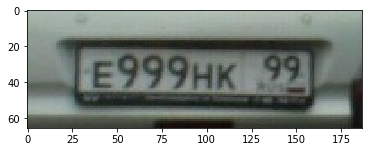

In [18]:
random_ind = np.random.randint(0,len(filepaths))
plt.imshow(cv2.imread(str(filepaths[random_ind])))

Path: /Users/alex/PycharmProjects/tips-tricks-project/CropNumbers/NumBase/E999HK 264.bmp
Label: E999HK 264


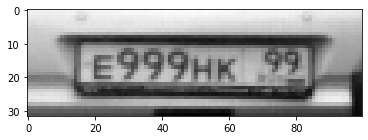

In [19]:
pic, label = ocr.getitem(random_ind) # __getitem__ переименовать в getitem
plt.imshow(pic, cmap='gray')
print('Path:', filepaths[random_ind])
print('Label:', label)
plt.show()

# -----

In [5]:
from progressbar import progressbar as pb
for i in pb(range(len(filepaths))):
    try:
        a = ocr.getitem(i)
    except:
        print(filepaths[i])

100% (6120 of 6120) |####################| Elapsed Time: 0:00:33 Time:  0:00:33


/Users/alex/PycharmProjects/tips-tricks-project/CropNumbers/NumBase/E495MB 1970.bmp
E495MB 197


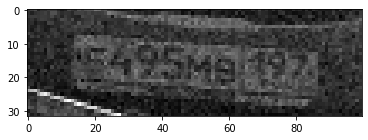

KeyboardInterrupt: 

In [6]:
while True:
    clear_output()
    ind = np.random.randint(0,len(filepaths))
    a = ocr.getitem(ind)
    print(filepaths[ind])
    plt.imshow(a[0], cmap='gray')
    print(a[1])
    plt.show()
    input()